In [1]:
from util import load_user_data
import pandas as pd
import sys
import numpy as np

valid_users, tp_data, _ = load_user_data(filename="../data/xailabdata_all.csv")
valid_users_2, tp_data_2, _ = load_user_data(filename="../data/xailabdata_llm_agent.csv")

valid_users = valid_users | valid_users_2
tp_data.update(tp_data_2)
variable_dict = {}
variable_dict["condition"] = []
dimensions = ["Reliability/Competence", "Understandability/Predictability", "Trust in Automation"]
for dimension in dimensions:
    variable_dict[dimension] = []
for user in valid_users:
    tp_condition = tp_data[user]["condition"]
    trust = tp_data[user]["Trust_in_automation"]
    variable_dict["condition"].append(tp_condition)
    for dimension in dimensions:
        variable_dict[dimension].append(trust[dimension])

df = pd.DataFrame(variable_dict)
print(df.shape)

condition_map = {
    "control": "Control",
    "dashboard": "Dashboard",
    "chatxai": "CXAI",
    "chatxaiboost": "ECXAI",
    "chatxaiAuto": "LLM Agent"
}
df["condition"] = df["condition"].map(condition_map)

245 valid participants
{'control': 61, 'dashboard': 61, 'chatxai': 62, 'chatxaiboost': 61, 'chatxaiAuto': 0}
91 participants blindly rely on AI advice
{'control': 8, 'dashboard': 27, 'chatxai': 32, 'chatxaiboost': 24, 'chatxaiAuto': 0}
61 valid participants
{'control': 0, 'dashboard': 0, 'chatxai': 0, 'chatxaiboost': 0, 'chatxaiAuto': 61}
25 participants blindly rely on AI advice
{'control': 0, 'dashboard': 0, 'chatxai': 0, 'chatxaiboost': 0, 'chatxaiAuto': 25}
(306, 4)


/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/dabest/plotter.py:473: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/dabest/plotter.py:563: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/dabest/plotter.py:473: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-pack

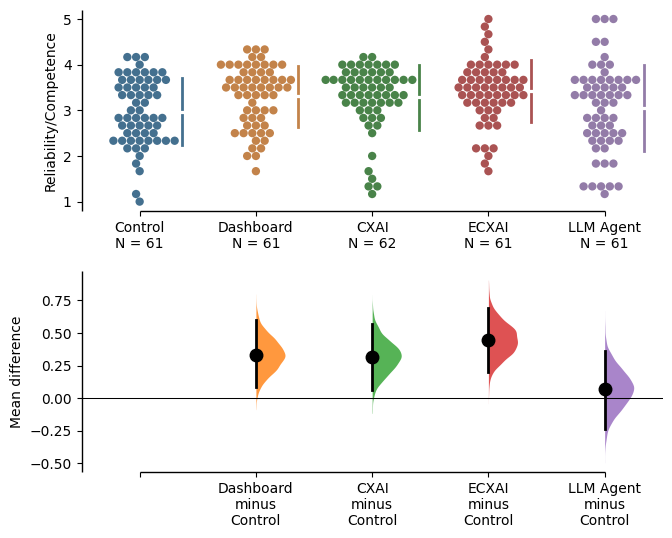

/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


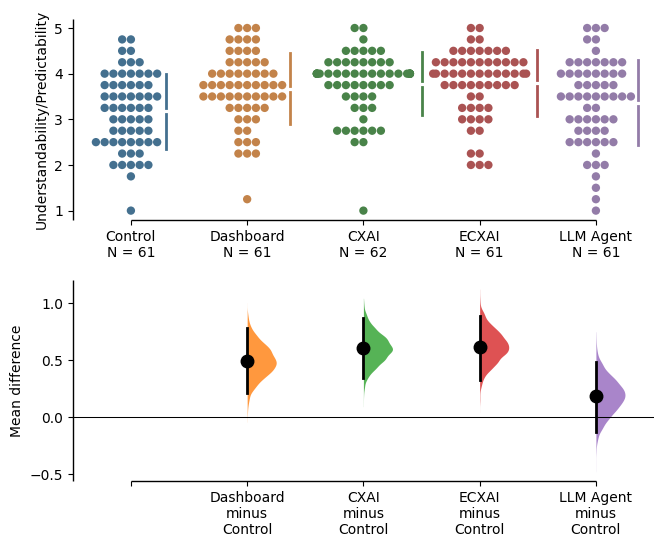

/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

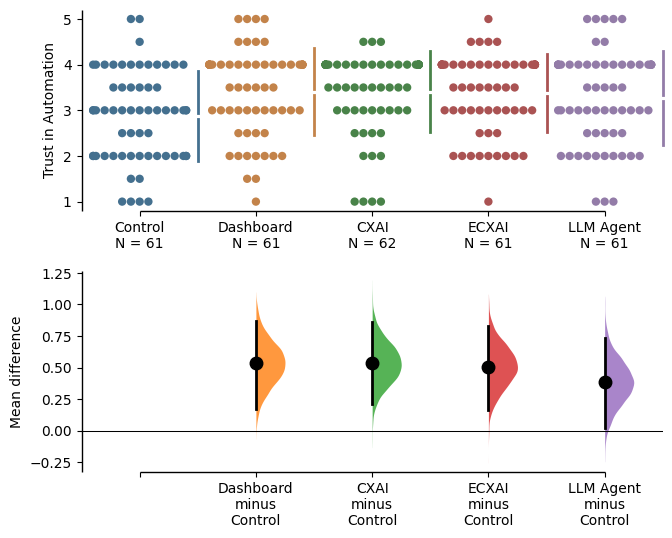

In [2]:
import dabest
# df["condition"].unique()
for dimension in dimensions:
    four_groups_unpaired = dabest.load(df, x="condition", idx=["Control", "Dashboard", "CXAI", "ECXAI", "LLM Agent"], y=dimension, resamples=5000, ci=95, x1_level=["Control", "Dashboard", "CXAI", "PCXAI"])
    four_groups_unpaired.mean_diff.plot();